In [7]:

import pandas as pd
import numpy as np
# Load your application data with Pandas
df = pd.read_csv('C:/Users/96655/Desktop/riyadh_resturants_clean.csv')
df['rating'] = df['rating'].fillna(0)
df['ratingSignals'] = df['ratingSignals'].fillna(0)

df.head()

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
0,مطعم وقت الشواية,Afghan Restaurant,"الرياض 14723, المملكة العربية السعودية",24.518983,46.656981,Moderate,0.0,0,0,0.0,0.0
1,ديوانية عكاظ,Café,"الرياض 14726, المملكة العربية السعودية",24.518511,46.669149,Cheap,0.0,2,0,0.0,0.0
2,شاهي جمر راعي الجمس,Coffee Shop,"الرياض 14726, المملكة العربية السعودية",24.519314,46.670041,Cheap,0.0,0,0,0.0,0.0
3,غدير الشام,Afghan Restaurant,المملكة العربية السعودية,24.519520,46.671660,Moderate,0.0,0,0,0.0,0.0
4,Dunkin',Donut Shop,"الرياض, المملكة العربية السعودية",24.525001,46.433944,Cheap,29.0,90,1,8.9,32.0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [9]:
df.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'price', 'likes',
       'photos', 'tips', 'rating', 'ratingSignals'],
      dtype='object')

In [10]:
df.columns = df.columns.map(str.strip)
df.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'price', 'likes',
       'photos', 'tips', 'rating', 'ratingSignals'],
      dtype='object')

In [11]:
# How many rows and columns does the dataset have?
df.shape

(19361, 11)

In [12]:
# View the correlations
df.corr()

,lat,lng,likes,photos,tips,rating,ratingSignals
lat,1.000000,0.114489,0.050506,0.054977,0.050642,0.082502,0.052854
lng,0.114489,1.000000,-0.054172,-0.064999,-0.057502,-0.040003,-0.056567
likes,0.050506,-0.054172,1.000000,0.795004,0.922806,0.297472,0.989933
photos,0.054977,-0.064999,0.795004,1.000000,0.711060,0.234264,0.793533
tips,0.050642,-0.057502,0.922806,0.711060,1.000000,0.295969,0.947834
rating,0.082502,-0.040003,0.297472,0.234264,0.295969,1.000000,0.308505
ratingSignals,0.052854,-0.056567,0.989933,0.793533,0.947834,0.308505,1.000000


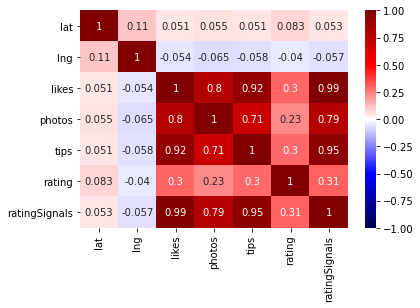

In [13]:
# example of a better corr matrix
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [ ]:
X = df[['likes', 'photos','tips','rating']]
y = df['categories']
data = pd.DataFrame({'price': ['Moderate', 'Cheap', 'Expensive', 'Very Expensive']})


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Multiplr Regression', fontsize=14)
plt.xlabel('Features(likes,photos,tips,rating)', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
from shapely.geometry import Point


# Convert it to a GeoDataFrame by transforming the Latitude/Longitude coordinates 
loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(df['lng'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, crs=loc_crs, geometry=loc_geom)

# Plot the GeoDataFrame
geo_df.plot()